In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
data_cond8 = np.loadtxt('con8_40kg_041124.txt', usecols=1, dtype=str)
data_cond3 = np.loadtxt('cond3_40kg_041124.txt', usecols=1, dtype=str)


# Convertir les autres colonnes en données numériques
data_cond8 = np.char.replace(data_cond8[:, ], ',', '.').astype(float)
data_cond3 = np.char.replace(data_cond3[:, ], ',', '.').astype(float)

x_cond8 = np.zeros(len(data_cond8))
x_cond3 = np.zeros(len(data_cond3))

for i in range(1,len(data_cond8)):
    x_cond8[i] =  x_cond8[i - 1] + 1 

for i in range(1,len(data_cond3)):
    x_cond3[i] = x_cond3[i - 1] + 1


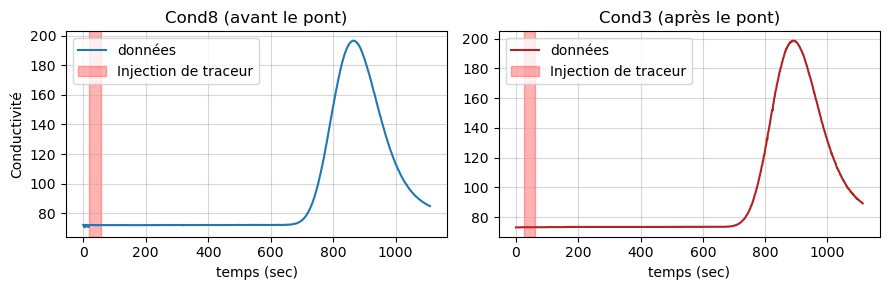

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

axes[0].plot(x_cond8, data_cond8, label='données')
axes[0].axvspan(x_cond8[20], x_cond8[56], color='red', alpha=0.3, label='Injection de traceur')
axes[0].set_title('Cond8 (avant le pont)')
axes[0].set_xlabel('temps (sec)')
axes[0].set_ylabel('Conductivité')
axes[0].grid(alpha=0.5)
axes[0].legend()

axes[1].plot(x_cond3, data_cond3, color='firebrick', label='données')
axes[1].axvspan(x_cond3[26], x_cond3[62], color='red', alpha=0.3, label='Injection de traceur')
axes[1].set_title('Cond3 (après le pont)')
axes[1].set_xlabel('temps (sec)')
axes[1]. grid(alpha=0.5)
axes[1].legend()

plt.tight_layout()
plt.show()

In [5]:
def recession8(x, _lambda):
    c8 = 71.9
    y0_8 = data_cond8[1050] - 71.9
    x0_8 = x_cond8[1050]
    return y0_8 * np.exp(_lambda * (x - x0_8)) +  c8

def recession3(x, _lambda):
    c3 = 73.3
    y0_3 = data_cond3[1050] - 73.3
    x0_3 = x_cond3[1050]
    return y0_3 * np.exp(_lambda * (x - x0_3)) +  c3

In [6]:
print(data_cond8[400])
print(data_cond3[400])

72.0
73.4


In [7]:
#vecteur pour modéliser ma courbe et paramètres

x0_8 = x_cond8[1050]
x0_3 = x_cond3[1050]

y0_8 = data_cond8[1050] - 71.9
y0_3 = data_cond3[1050] - 73.3

xi_8 = np.linspace(x0_8, x0_8 + 500, 500)
xi_3 = np.linspace(x0_3, x0_3 + 500, 500)

c8 = 71.9
c3 = 73.3

_lambda8 = -0.01
_lambda3 = -0.01

In [8]:
#appel de la fonction

yi_8 = recession8(xi_8, _lambda8)
yi_3 = recession3(xi_3, _lambda3)

72.05362519157916


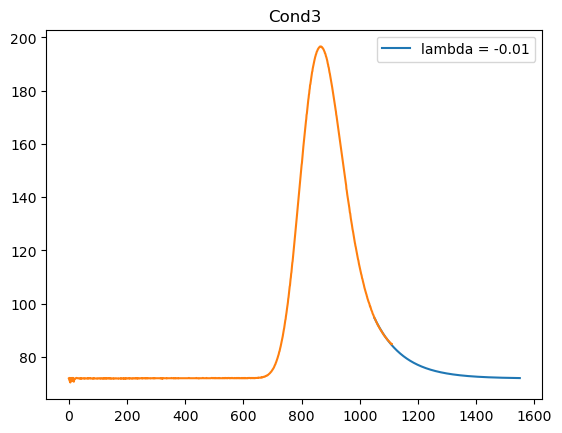

In [9]:
plt.plot(xi_8, yi_8, label='lambda = -0.01')
plt.plot(x_cond8, data_cond8)
plt.legend()
plt.title('Cond3')
plt.plot
print(yi_8[-1])

Cela fonctionne déjà très bien mais je vais chercher les paramètres optimaux avec curve_fit

In [10]:
#recherche du lamda idéal pour le cond8

x_fit8 = x_cond8[1050:]
y_fit8 = data_cond8[1050:]

sol_cond8 = curve_fit(recession8, x_fit8, y_fit8, p0=[_lambda8])

sol_cond8

(array([-0.00996153]), array([[1.27757446e-09]]))

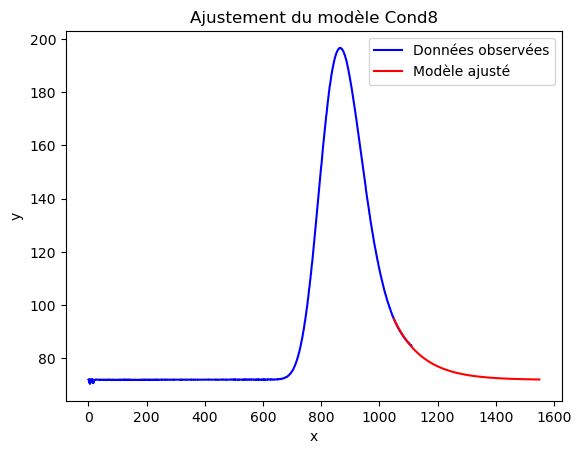

72.05660866202054


In [11]:
# Tracé des données
plt.plot(x_cond8, data_cond8, label='Données observées', color='blue')

# Tracé du modèle ajusté
params = sol_cond8[0]
lambda_fit = params
y_model = recession8(xi_8, lambda_fit)
plt.plot(xi_8, y_model, label='Modèle ajusté', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajustement du modèle Cond8')
plt.show()

print(y_model[-1])


73.51426671457091


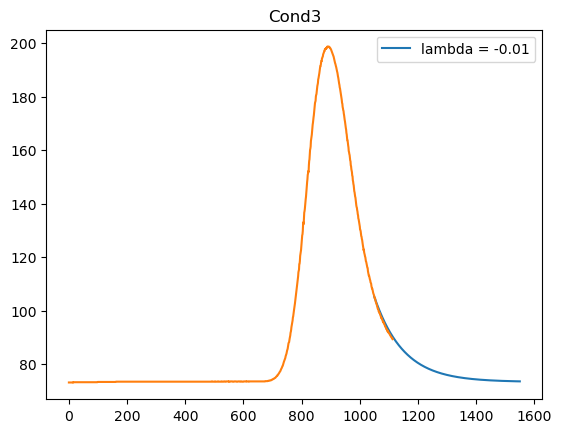

In [12]:
plt.plot(xi_3, yi_3, label='lambda = -0.01')
plt.plot(x_cond3, data_cond3)
plt.title('Cond3')
plt.legend()
plt.plot
print(yi_3[-1])

In [13]:
#recherche du lamda idéal pour le cond3

x_fit3 = x_cond3[1050:]
y_fit3 = data_cond3[1050:]

sol_cond3 = curve_fit(recession3, x_fit3, y_fit3, p0=[_lambda3])

sol_cond3

(array([-0.01124963]), array([[1.77772748e-09]]))

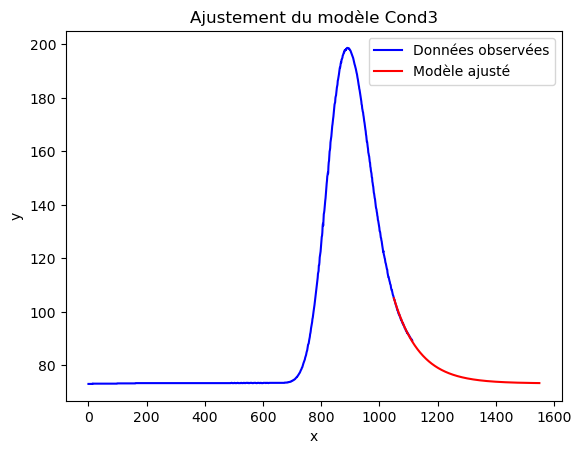

73.41471000572068


In [14]:
# Tracé des données
plt.plot(x_cond3, data_cond3, label='Données observées', color='blue')

# Tracé du modèle ajusté
params3 = sol_cond3[0]
lambda_fit3 = params3
y_model3 = recession3(xi_3, lambda_fit3)
plt.plot(xi_3, y_model3, label='Modèle ajusté', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajustement du modèle Cond3')
plt.show()

print(y_model3[-1])

In [15]:
#conversion de l'axe des x en min 

print(len(x_cond8), len(xi_8), x_cond8[-1], xi_8[0], (len(x_cond8) + len(xi_8)) - (x_cond8[-1] - xi_8[0]))
print(len(x_cond3), len(xi_3), x_cond3[-1], xi_3[0], (len(x_cond3) + len(xi_3)) - (x_cond3[-1] - xi_3[0]))

a = (len(x_cond8) + len(xi_8)) - (x_cond8[-1] - xi_8[0])
b = (len(x_cond3) + len(xi_3)) - (x_cond3[-1] - xi_3[0])

x_cond8minute = [ (i  / 60) * 5 for i in x_cond8]
xi_8minute = [ (i / 60)* 5 for i in xi_8]

x_cond3minute = [ (i / 60) * 5 for i in x_cond3]
xi_3minute = [ (i / 60) * 5 for i in xi_3]

1111 500 1110.0 1050.0 1551.0
1114 500 1113.0 1050.0 1551.0


In [24]:
# utilisation de la matrice de covariance et de l'intervalle de confiance à 95%

# Propagation d'erreur avec la méthode de Monte Carlo

n_sim_8 = 150  
pi_8 = np.random.multivariate_normal(sol_cond8[0], sol_cond8[1], n_sim_8).flatten()

nb_8 = np.zeros((n_sim_8, len(xi_8)))

for i, p_sim_8 in enumerate(pi_8):  
    nb_8[i, :] = recession8(xi_8, p_sim_8)

ymin_8 = np.percentile(nb_8, 2.5, axis=0)
ymax_8 = np.percentile(nb_8, 97.5, axis=0) 


n_sim_3 = 150  
pi_3 = np.random.multivariate_normal(sol_cond3[0], sol_cond3[1], n_sim_3).flatten()

nb_3 = np.zeros((n_sim_3, len(xi_3)))

for i, p_sim_3 in enumerate(pi_3):  
    nb_3[i, :] = recession3(xi_3, p_sim_3)

ymin_3 = np.percentile(nb_3, 2.5, axis=0)
ymax_3 = np.percentile(nb_3, 97.5, axis=0)

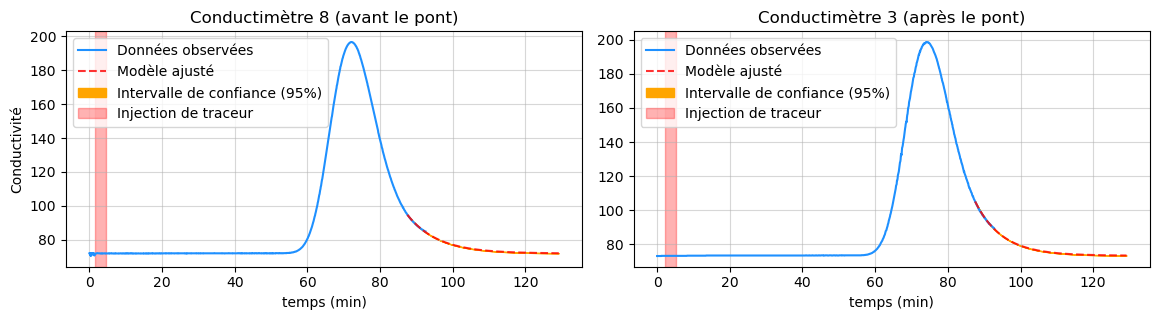

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(11.7, 3.3))

axes[0].plot(x_cond8minute, data_cond8, color='dodgerblue', label='Données observées')
axes[0].plot(xi_8minute, y_model, '--', label='Modèle ajusté', color='red', alpha=0.8)
axes[0].fill_between(xi_8minute, ymin_8, ymax_8, color='orange', alpha=1, label="Intervalle de confiance (95%)")
axes[0].axvspan(x_cond8minute[20], x_cond8minute[56], color='red', alpha=0.3, label='Injection de traceur')
axes[0].set_title('Conductimètre 8 (avant le pont)')
axes[0].set_xlabel('temps (min)')
axes[0].set_ylabel('Conductivité')
axes[0].grid(alpha=0.5)
axes[0].legend()

axes[1].plot(x_cond3minute, data_cond3, color='dodgerblue', label='Données observées')
axes[1].plot(xi_3minute, y_model3, '--', label='Modèle ajusté', color='red', alpha=0.8)
axes[1].fill_between(xi_3minute, ymin_3, ymax_3, color='orange', alpha=1, label="Intervalle de confiance (95%)")
axes[1].axvspan(x_cond3minute[26], x_cond3minute[62], color='red', alpha=0.3, label='Injection de traceur')
axes[1].set_title('Conductimètre 3 (après le pont)')
axes[1].set_xlabel('temps (min)')
axes[1]. grid(alpha=0.5)
axes[1].legend()


plt.tight_layout()
plt.savefig('1tracage_sel40_graphe.png', dpi=300, bbox_inches='tight')
plt.show()


